In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# True and predicted values
y_true = np.array([3, 5, 7])
y_pred = np.array([2, 5, 8])

# MAE
mae = mean_absolute_error(y_true, y_pred)

# RMSE
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5

# R2 Score
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.6667
RMSE: 0.8165
R² Score: 0.7500


Example 1: Perfect Prediction

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true = [10, 20, 30, 40, 50]
y_pred = [10, 20, 30, 40, 50]

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred) ** 0.5
r2 = r2_score(y_true, y_pred)

print("Example 1: Perfect Prediction")
print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}\n")

Example 1: Perfect Prediction
MAE: 0.0, RMSE: 0.0, R²: 1.0



All metrics are perfect. Best case.



Small Uniform Errors


In [5]:
y_pred = [11, 19, 29, 39, 49]  # 1 unit off each

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred) ** 0.5
r2 = r2_score(y_true, y_pred)

print("Example 2: Small Uniform Errors")
print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}\n")

Example 2: Small Uniform Errors
MAE: 1.0, RMSE: 1.0, R²: 0.995



MAE and RMSE are close. R² still high (model is good).

One Large Outlier

In [6]:
y_pred = [10, 20, 30, 40, 90]  # Last value is way off

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred) ** 0.5
r2 = r2_score(y_true, y_pred)

print("Example 3: One Large Outlier")
print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}\n")

Example 3: One Large Outlier
MAE: 8.0, RMSE: 17.88854381999832, R²: -0.6000000000000001



RMSE shoots up due to squaring the large error. MAE less affected. RMSE highlights sensitivity to outliers.

Example 4: All Random Predictions (Bad Model)

In [7]:
y_pred = [80, 15, 5, 60, 22]

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred) ** 0.5
r2 = r2_score(y_true, y_pred)

print("Example 4: Random Predictions")
print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}\n")

Example 4: Random Predictions
MAE: 29.6, RMSE: 36.698773821478014, R²: -5.734



All metrics are poor. R² may be negative, which means the model is worse than just predicting the mean.

Example 5: Better on Small Values, Worse on Large

In [8]:
y_true = [1, 2, 3, 40, 50]
y_pred = [1, 2, 2.5, 35, 60]

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred) ** 0.5
r2 = r2_score(y_true, y_pred)

print("Example 5: Uneven Error Distribution")
print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}\n")

Example 5: Uneven Error Distribution
MAE: 3.1, RMSE: 5.004997502496879, R²: 0.944843227056544



Small absolute errors (low MAE), but RMSE is higher due to squaring the bigger errors on larger values.

Example 1: Classification Tree

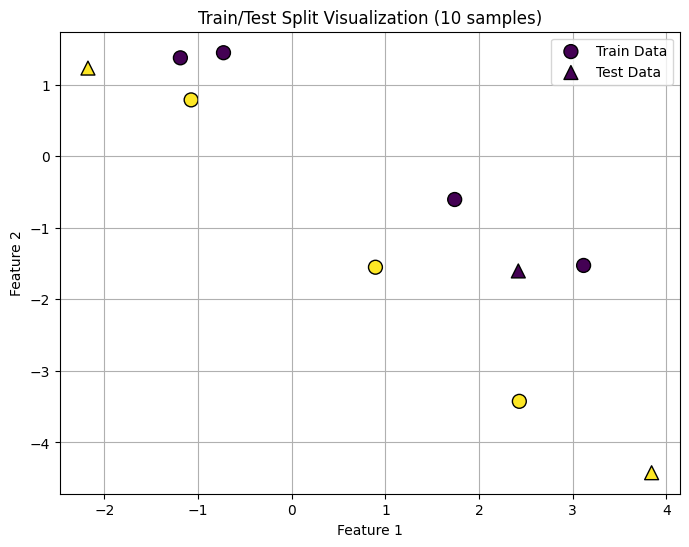

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate 2D classification dataset (10 samples, 2 features)
X, y = make_classification(n_samples=10, n_features=4, n_classes=2, random_state=1)

# Split into training and testing data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# Visualize train and test split
plt.figure(figsize=(8, 6))

# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', s=100, edgecolor='k', label='Train Data')

# Plot test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='^', s=100, edgecolor='k', label='Test Data')

plt.title("Train/Test Split Visualization (10 samples)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification, make_regression

In [13]:
# Create classification data
X, y = make_classification(n_samples=200, n_features=4, n_classes=2, random_state=42)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = clf.predict(X_test)
print("=== Classification Tree ===")
print(classification_report(y_test, y_pred))


=== Classification Tree ===
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        31
           1       0.92      0.76      0.83        29

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



🧪 Example 2: Regression Tree


In [14]:
# Create regression data
X, y = make_regression(n_samples=200, n_features=4, noise=15, random_state=42)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Decision Tree Regressor
reg = DecisionTreeRegressor(criterion='squared_error', random_state=42)
reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = reg.predict(X_test)
print("\n=== Regression Tree ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")




=== Regression Tree ===
MSE: 1955.78
R² Score: 0.73


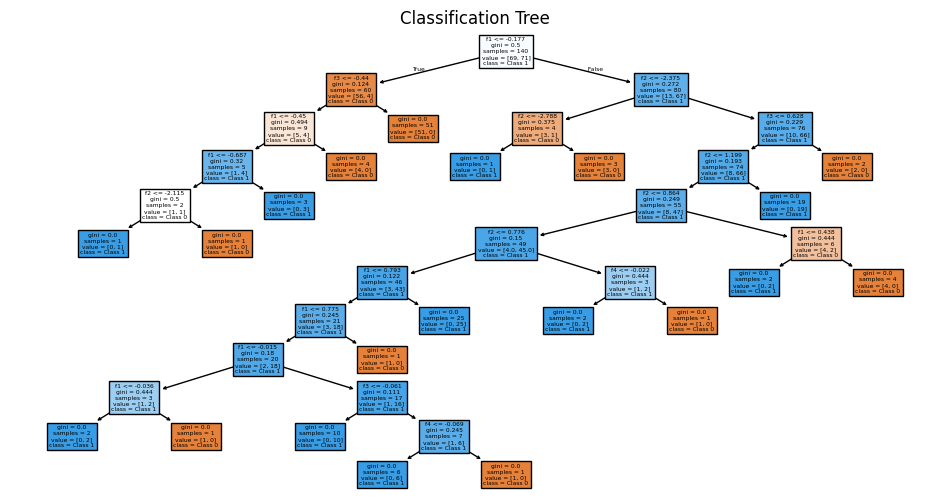

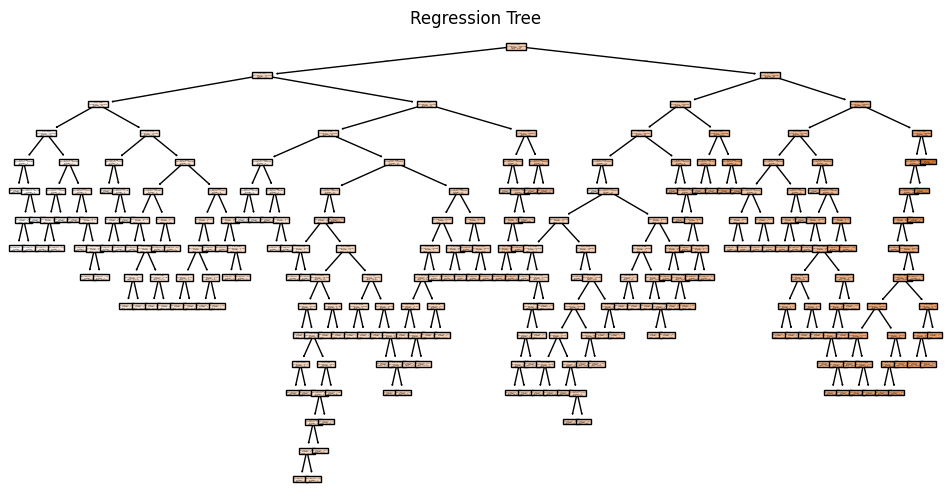

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=['f1', 'f2', 'f3', 'f4'], class_names=['Class 0', 'Class 1'])
plt.title("Classification Tree")
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(reg, filled=True, feature_names=['f1', 'f2', 'f3', 'f4'])
plt.title("Regression Tree")
plt.show()


Random Forest


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.89      0.91        18
           2       0.83      0.91      0.87        11

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



2. Gradient Boosting Machines (GBM)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.89      0.94        18
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



3. Model Stacking

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svm', SVC(probability=True, kernel='linear'))
]

meta_model = LogisticRegression()

stack = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print("Stacking Model Classification Report:\n", classification_report(y_test, y_pred))

Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.89      0.91        18
           2       0.83      0.91      0.87        11

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

